# 2  度分布与节点中心性展示

In [39]:
import networkx as nx                  #导入networkx网络分析模块，缩写为nx。Networkx为基于Python的最基本的网络分析库。
import numpy as np                     #导入numpy模块，缩写为np。 Numpy为基于Python的多维数组计算库。
from numpy import random as nr        #导入Numpy库中的random模块，缩写为nr。包含常用的随机数函数。       

In [40]:
#导入matplotlib绘图与可视化库
% matplotlib inline 
#导入matplotlib绘图与可视化库中的pylab模块。该种方式导入后可将图表作为图像插入到Notebook中。
% pylab inline  

Populating the interactive namespace from numpy and matplotlib


## 1 网络的度分布(Degree Distribution)

度分布：网络中随机选取的一个节点的度为$k$的概率$P\left ( k \right )$，通过网络中节点度的分布规律刻画不同节点的重要性。  
度分布函数$P\left ( k \right )$：网络中度为$k$的节点在整个网络中所占的比例，即度值为$k$的节点数目与网络总节点数目$n$的比值。

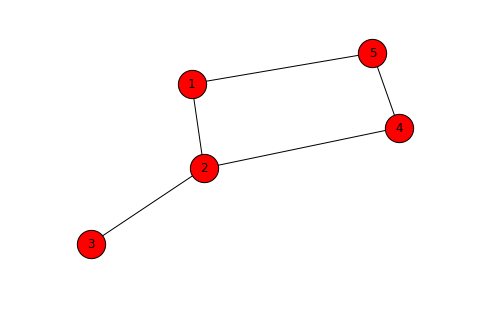

In [41]:
G = nx.Graph() 
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,5),(2,3),(2,4),(4,5)])
nx.draw(G,with_labels=True, node_size = 800)

|  度      值    $k$     |  概    率     $P\left ( k \right )$ |  次    数    $n\left ( k \right )$ |  节    点    集    合   |
|:--------------------:|:-------------------------:|:-------------------------:||:-------------------------------------:|
|        0             |             0/5           |             0              |         $\left \{  \right \}$         |
|        1             |             1/5           |             1              |         $\left \{ 3 \right \}$        |
|        2             |             3/5           |             3              |         $\left \{ 1,4,5 \right \}$    |
|        3             |             1/5           |             1              |         $\left \{ 2 \right \}$         |

度分布的实际应用：在大规模网络中，度分布通常作为区分不同类型网络的指标，比如ER随机图服从“泊松分布”，在线社交网络等真实复杂网络服从“幂律分布”。

### 1.1 ER随机网络的度分布

随机网络中大部分节点集中在网络的平均度附近并达到峰值，而远离平均度的节点数目按照指数衰减，称平均度为网络的特征标度。

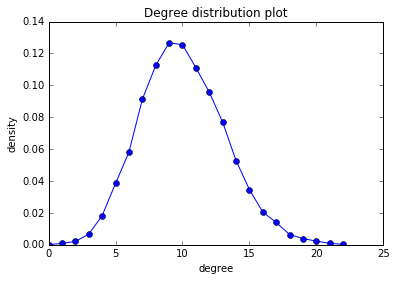

In [42]:
G = nx.random_graphs.erdos_renyi_graph(10000,0.001)   
degree =  nx.degree_histogram(G)                                                 # 获取网络节点的度分布，即各度值出现的次数。
degree_index = range(len(degree)) 
degree_distribution = [degree_i / float(sum(degree)) for degree_i in degree]     #将频次转换为概率

plot(degree_index,degree_distribution,'b-',marker='o')
title("Degree distribution plot")
ylabel("density")
xlabel("degree")

savefig("ER_degree_histogram.png")

网络中所有节点的度都与平均度相差不大。换句话说，网络中不存在一个具有比平均度大的太多的度值的节点。  
称具有该类度分布的网络为均匀网络或匀质网络(homogeneous network)。

### 1.2 BA无标度网络的度分布

现实网络大部分都不是随机网络，网络节点的度值差异悬殊。  
大多数节点有少量连边，而少数节点有大量连边，网络没有一个明显的特征标度（如峰值或平均值）。

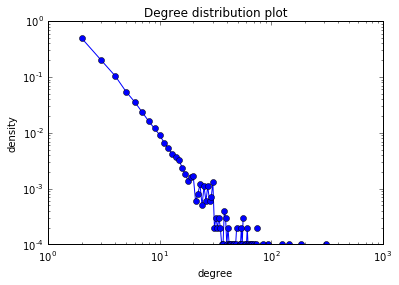

In [43]:
G = nx.random_graphs.barabasi_albert_graph(10000,2)                              #生成n=10000、m=2的BA无标度网络
degree =  nx.degree_histogram(G) 
degree_index = range(len(degree)) 
degree_distribution = [degree_i / float(sum(degree)) for degree_i in degree]     #将频次转换为概率

loglog(degree_index,degree_distribution,'b-',marker='o')
title("Degree distribution plot")
ylabel("density")
xlabel("degree")

savefig("BA_degree_histogram.png")

网络中节点的度值很不均匀，既存在度相对小的节点，也存在度相对非常大的节点。换句话说，网络中不存在一个明显的特征标度，一般称具有该类度分布的网络为非均匀网络或异质网络。

## 2 网络中节点的重要性及其可视化

很多复杂网络呈现出异质的拓扑结构，这说明这些网络中每个节点的重要程度是不同的。在复杂网络的各种基础研究工作中，识别出网络中的一些最重要节点具有非常明显的实用价值。对于各种各样的实证网络，识别出重要节点可以针对性地分析其性质，制定正确的策略和措施。如在恐怖组织关系网络中，如果能定位出组织中的头目和骨干分子，那么就能迅速侦察到恐怖集团的破坏行动；在大规模计算机网络中，可以根据服务器节点的重要程度进行有针对性的备份，这样既能保证网络的鲁棒性，也能有效地节省资源；在传染病传播的社交网络中，如果能尽快找出超级传染者，就可以有针对性地治疗和隔离重点病人，有效防止病毒的传播和扩散。为满足应用的需求就需要设计和计算各种有针对性的中心化指标，不同类型的复杂网络通常也需要使用不同的中心化指标来进行度量和刻画。目前最常用的衡量节点重要性的中心化指标为度中心性指标、紧密度中心性指标和介数中心性指标

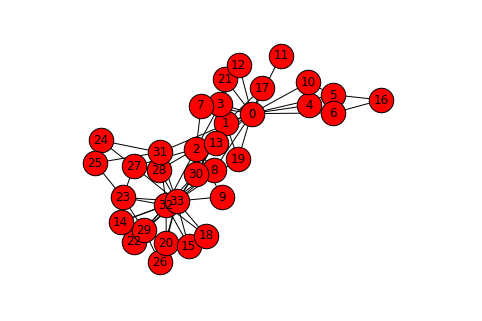

In [44]:
# 连边对数据可以直接读取来生成网络
G = nx.read_edgelist("karate.txt")
G = G.to_undirected()  
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,node_size=600)

### 2.1 度中心性 (Degree Centrality)
节点度就是所有和它直接相连的节点数量，是研究网络拓扑结构的最基本参数。节点的度值体现了该节点和周围节点之间建立直接联系的能力，因此节点的度值中心性大小体现了节点的活跃特性，中心性较高的节点具有较多的连接关系。设网络中有个节点，则节点的度指标计算公式为![](图片4.png)

其中，![Alt text](图片5.png)表示节点直接相连的节点数，也就是该节点的度值。

In [45]:
#求节点的度
degree_G=G.degree()
print degree_G

{u'24': 3, u'25': 3, u'26': 2, u'27': 4, u'20': 2, u'21': 2, u'22': 2, u'23': 5, u'28': 3, u'29': 4, u'1': 9, u'0': 16, u'3': 6, u'2': 10, u'5': 4, u'4': 3, u'7': 4, u'6': 4, u'9': 2, u'8': 5, u'11': 1, u'10': 3, u'13': 5, u'12': 2, u'15': 2, u'14': 2, u'17': 2, u'16': 2, u'19': 3, u'32': 12, u'31': 6, u'30': 4, u'33': 17, u'18': 2}


In [46]:
#取出键值
degree_values=degree_G.values()
print degree_values

[3, 3, 2, 4, 2, 2, 2, 5, 3, 4, 9, 16, 6, 10, 4, 3, 4, 4, 2, 5, 1, 3, 5, 2, 2, 2, 2, 2, 3, 12, 6, 4, 17, 2]


In [47]:
#取键形成新的列表
degree_keys=degree_G.keys()
print degree_keys

[u'24', u'25', u'26', u'27', u'20', u'21', u'22', u'23', u'28', u'29', u'1', u'0', u'3', u'2', u'5', u'4', u'7', u'6', u'9', u'8', u'11', u'10', u'13', u'12', u'15', u'14', u'17', u'16', u'19', u'32', u'31', u'30', u'33', u'18']


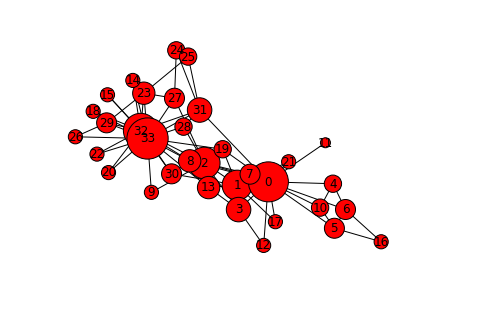

In [48]:
# 画网络图，节点的尺寸对应度中心性大小
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=degree_keys,node_size=[x*100 for x in degree_values])

In [49]:
#注意：由于nodelist中节点顺序取的是系统默认顺序，所以与nodesize的对应关系正确。

In [50]:
#若对节点的度中心性值进行归一化，那么需要将节点度值除以节点最大可能度值，即n-1，n为网络节点数目。
degree_G=nx.degree_centrality(G)
print degree_G

{u'24': 0.09090909090909091, u'25': 0.09090909090909091, u'26': 0.06060606060606061, u'27': 0.12121212121212122, u'20': 0.06060606060606061, u'21': 0.06060606060606061, u'22': 0.06060606060606061, u'23': 0.15151515151515152, u'28': 0.09090909090909091, u'29': 0.12121212121212122, u'1': 0.2727272727272727, u'0': 0.48484848484848486, u'3': 0.18181818181818182, u'2': 0.30303030303030304, u'5': 0.12121212121212122, u'4': 0.09090909090909091, u'7': 0.12121212121212122, u'6': 0.12121212121212122, u'9': 0.06060606060606061, u'8': 0.15151515151515152, u'11': 0.030303030303030304, u'10': 0.09090909090909091, u'13': 0.15151515151515152, u'12': 0.06060606060606061, u'15': 0.06060606060606061, u'14': 0.06060606060606061, u'17': 0.06060606060606061, u'16': 0.06060606060606061, u'19': 0.09090909090909091, u'32': 0.36363636363636365, u'31': 0.18181818181818182, u'30': 0.12121212121212122, u'33': 0.5151515151515151, u'18': 0.06060606060606061}


### 2.2 紧密度中心性 (Closeness Centrality)
节点中心性的第二种观点是建立在紧密度概念的基础上，度量方法强调在所有节点的集合中，某一个节点与所有其他节点之间的接近程度。从接近程度的角度看，占据中心的节点在与其他节点之间交流信息时比较有效率。紧密度中心性刻画网络中节点到达网络中其它节点的难易程度, 其值定义为该节点到达所有其它节点的最短距离之和的倒数。度中心性指标反映了一个节点对于网络中其他节点的直接影响力，而紧密度中心性指标则反映的是节点通过网络对其他节点施加影响的能力，因而紧密度指标相对于度指标更加能反映网络全局的结构。

In [51]:
# 获取节点的紧密度中心性
closeness_G=nx.closeness_centrality(G)
print closeness_G

{u'24': 0.375, u'25': 0.375, u'26': 0.3626373626373626, u'27': 0.4583333333333333, u'20': 0.3707865168539326, u'21': 0.375, u'22': 0.3707865168539326, u'23': 0.39285714285714285, u'28': 0.4520547945205479, u'29': 0.38372093023255816, u'1': 0.4852941176470588, u'0': 0.5689655172413793, u'3': 0.4647887323943662, u'2': 0.559322033898305, u'5': 0.38372093023255816, u'4': 0.3793103448275862, u'7': 0.44, u'6': 0.38372093023255816, u'9': 0.4342105263157895, u'8': 0.515625, u'11': 0.36666666666666664, u'10': 0.3793103448275862, u'13': 0.515625, u'12': 0.3707865168539326, u'15': 0.3707865168539326, u'14': 0.3707865168539326, u'17': 0.375, u'16': 0.28448275862068967, u'19': 0.5, u'32': 0.515625, u'31': 0.5409836065573771, u'30': 0.4583333333333333, u'33': 0.55, u'18': 0.3707865168539326}


In [52]:
#取出键值
closeness_values=closeness_G.values()
print closeness_values

[0.375, 0.375, 0.3626373626373626, 0.4583333333333333, 0.3707865168539326, 0.375, 0.3707865168539326, 0.39285714285714285, 0.4520547945205479, 0.38372093023255816, 0.4852941176470588, 0.5689655172413793, 0.4647887323943662, 0.559322033898305, 0.38372093023255816, 0.3793103448275862, 0.44, 0.38372093023255816, 0.4342105263157895, 0.515625, 0.36666666666666664, 0.3793103448275862, 0.515625, 0.3707865168539326, 0.3707865168539326, 0.3707865168539326, 0.375, 0.28448275862068967, 0.5, 0.515625, 0.5409836065573771, 0.4583333333333333, 0.55, 0.3707865168539326]


In [53]:
#取键形成新的列表
closeness_keys=closeness_G.keys()
print closeness_keys

[u'24', u'25', u'26', u'27', u'20', u'21', u'22', u'23', u'28', u'29', u'1', u'0', u'3', u'2', u'5', u'4', u'7', u'6', u'9', u'8', u'11', u'10', u'13', u'12', u'15', u'14', u'17', u'16', u'19', u'32', u'31', u'30', u'33', u'18']


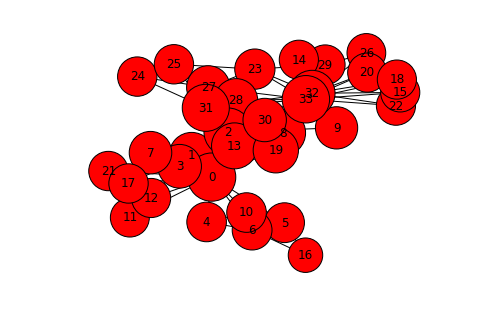

In [54]:
# 画网络图，节点的尺寸对应紧密度中心性大小
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=closeness_keys,node_size=[x*4000+50 for x in closeness_values])

###  2.3 介数中心性 (Betweenness Centrality)
介数中心性是建立在以下假设的基础上，即一个节点如果能够控制传播通道的话，则它在网络中应该获得更大的权利且具有较高的重要性。两个不相邻节点之间的相互作用依赖于网络中的其他节点，特别是那些在这两个节点之间提供连接路径的节点，因此可认为重要节点在某种程度上控制着很多不相邻节点之间的相互作用，这就是介数中心性的物理意义。介数指标刻画了网络中节点对于信息流动的影响力，在网络中使用最短路径路由算法，介数中心性指标刻画了信息流经给定节点的可能性，节点的介数中心性均会随着经过该节点的信息流的增大而增大，因此利用介数指标可以确定信息负载繁重的网络节点。

In [55]:
# 获取节点的介数中心性
betweenness_G=nx.betweenness_centrality(G)
print betweenness_G

{u'24': 0.0022095959595959595, u'25': 0.0038404882154882162, u'26': 0.0, u'27': 0.02233345358345358, u'20': 0.0, u'21': 0.0, u'22': 0.0, u'23': 0.017613636363636366, u'28': 0.0017947330447330447, u'29': 0.0029220779220779218, u'1': 0.053936688311688304, u'0': 0.43763528138528146, u'3': 0.011909271284271284, u'2': 0.14365680615680618, u'5': 0.029987373737373736, u'4': 0.0006313131313131313, u'7': 0.0, u'6': 0.029987373737373736, u'9': 0.0008477633477633479, u'8': 0.05592682780182781, u'11': 0.0, u'10': 0.0006313131313131313, u'13': 0.045863395863395856, u'12': 0.0, u'15': 0.0, u'14': 0.0, u'17': 0.0, u'16': 0.0, u'19': 0.03247504810004811, u'32': 0.14524711399711399, u'31': 0.13827561327561325, u'30': 0.01441197691197691, u'33': 0.304074975949976, u'18': 0.0}


In [56]:
#取出键值
betweenness_values=betweenness_G.values()
print betweenness_values

[0.0022095959595959595, 0.0038404882154882162, 0.0, 0.02233345358345358, 0.0, 0.0, 0.0, 0.017613636363636366, 0.0017947330447330447, 0.0029220779220779218, 0.053936688311688304, 0.43763528138528146, 0.011909271284271284, 0.14365680615680618, 0.029987373737373736, 0.0006313131313131313, 0.0, 0.029987373737373736, 0.0008477633477633479, 0.05592682780182781, 0.0, 0.0006313131313131313, 0.045863395863395856, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03247504810004811, 0.14524711399711399, 0.13827561327561325, 0.01441197691197691, 0.304074975949976, 0.0]


In [57]:
#取键形成新的列表
betweenness_keys=betweenness_G.keys()
print betweenness_keys

[u'24', u'25', u'26', u'27', u'20', u'21', u'22', u'23', u'28', u'29', u'1', u'0', u'3', u'2', u'5', u'4', u'7', u'6', u'9', u'8', u'11', u'10', u'13', u'12', u'15', u'14', u'17', u'16', u'19', u'32', u'31', u'30', u'33', u'18']


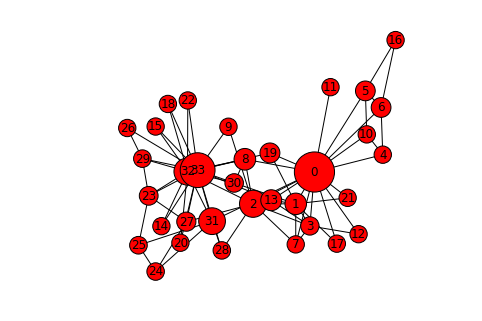

In [58]:
# 画网络图，节点的尺寸对应紧密度中心性大小
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=betweenness_keys,node_size=[x*3000+300 for x in betweenness_values])

###  2.4 特征向量中心性（eigenvector centrality）
一个节点会由于连接到一些本身很重要的节点，而使自身的重要性得到提升，这是特征向量中心性的本质。  
一个节点的重要性既取决于其邻居节点的数量（即该节点的度），也取决于其邻居节点的重要性。  
计算时不是简单地为每一个邻居节点赋一个值，而是根据该邻居节点的邻居节点赋值之和，成正比地为其赋值。

特征向量中心性的值会随着两方面的因素变大：  
1.该节点有多个邻居节点；2. 该节点的邻居节点中有很重要的节点。

In [59]:
# 获取节点的特征向量中心性
eigenvector_G=nx.eigenvector_centrality_numpy(G)
print eigenvector_G

{u'24': 0.057052440541165615, u'25': 0.05920647491677843, u'26': 0.07557941348827213, u'27': 0.1334771533802402, u'20': 0.10140326218952456, u'21': 0.09239953819570268, u'22': 0.10140326218952453, u'23': 0.15011857186115282, u'28': 0.13107782298371076, u'29': 0.1349608192623279, u'1': 0.26595991955249176, u'0': 0.35549144452456655, u'3': 0.21117972037789037, u'2': 0.31719250448643177, u'5': 0.07948304511709935, u'4': 0.0759688181830689, u'7': 0.17095974804479636, u'6': 0.07948304511709925, u'9': 0.10267425072358621, u'8': 0.22740390712540007, u'11': 0.052855697493521314, u'10': 0.07596881818306882, u'13': 0.2264727201424812, u'12': 0.08425462871671369, u'15': 0.1014032621895245, u'14': 0.10140326218952457, u'17': 0.09239953819570264, u'16': 0.023635628104591296, u'19': 0.14791251029338753, u'32': 0.30864421979104734, u'31': 0.19103384140654361, u'30': 0.17475830231435271, u'33': 0.3733634702914833, u'18': 0.10140326218952453}


In [60]:
#取出键值
eigenvector_values=eigenvector_G.values()
print eigenvector_values

[0.057052440541165615, 0.05920647491677843, 0.07557941348827213, 0.1334771533802402, 0.10140326218952456, 0.09239953819570268, 0.10140326218952453, 0.15011857186115282, 0.13107782298371076, 0.1349608192623279, 0.26595991955249176, 0.35549144452456655, 0.21117972037789037, 0.31719250448643177, 0.07948304511709935, 0.0759688181830689, 0.17095974804479636, 0.07948304511709925, 0.10267425072358621, 0.22740390712540007, 0.052855697493521314, 0.07596881818306882, 0.2264727201424812, 0.08425462871671369, 0.1014032621895245, 0.10140326218952457, 0.09239953819570264, 0.023635628104591296, 0.14791251029338753, 0.30864421979104734, 0.19103384140654361, 0.17475830231435271, 0.3733634702914833, 0.10140326218952453]


In [61]:
#取键形成新的列表
eigenvector_keys=eigenvector_G.keys()
print eigenvector_keys  

[u'24', u'25', u'26', u'27', u'20', u'21', u'22', u'23', u'28', u'29', u'1', u'0', u'3', u'2', u'5', u'4', u'7', u'6', u'9', u'8', u'11', u'10', u'13', u'12', u'15', u'14', u'17', u'16', u'19', u'32', u'31', u'30', u'33', u'18']


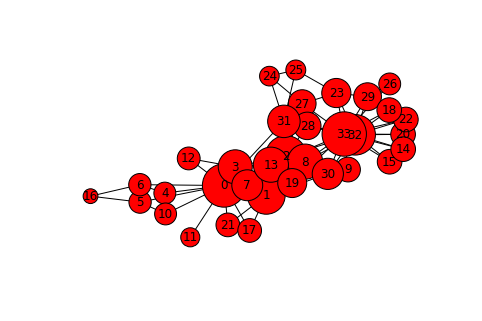

In [62]:
# 画网络图，节点的尺寸对应特征向量中心性大小
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=eigenvector_keys,node_size=[x*5000+100 for x in eigenvector_values])

###  2.5 katz中心性(katz centrality)

特征向量中心性对于无向网络和有向网络均适用，但是在无向网络中的效果更好。  
由于有向网络中，中心性主要是由指向节点的节点，而不是有节点指向的节点赋予的，因此会出现入度为0的节点的特征向量中心性为0.  Katz中心性是特征向量中心性的变形，通过自由参数调节特征向量与常数项之间的平衡，克服特征向量中心性在有向网络中的不足。  

In [63]:
# 获取节点的Katz中心性
katz_G=nx.katz_centrality_numpy(G)
print katz_G

{u'24': 0.11021103786319623, u'25': 0.11156458182124111, u'26': 0.1129354992785383, u'27': 0.15190165630074862, u'20': 0.12513341330533256, u'21': 0.12016514349139494, u'22': 0.12513341330533256, u'23': 0.1667906398392426, u'28': 0.14358164876465299, u'29': 0.15310602721711067, u'1': 0.2354842748330485, u'0': 0.3213246219124112, u'3': 0.19491321487927188, u'2': 0.26576591973677505, u'5': 0.13097224917085223, u'4': 0.12190437880575039, u'7': 0.1662330569529996, u'6': 0.1309722491708523, u'9': 0.12420148853050475, u'8': 0.2007178298475908, u'11': 0.09661671600809009, u'10': 0.12190437880575039, u'13': 0.19937369969297786, u'12': 0.11610803749601728, u'15': 0.12513341330533256, u'14': 0.12513341330533256, u'17': 0.12016514349139494, u'16': 0.0906787036510194, u'19': 0.15330578623137323, u'32': 0.2750851674850533, u'31': 0.1938016023414827, u'30': 0.16875362377339648, u'33': 0.3314064273997826, u'18': 0.12513341330533256}


In [64]:
#取出键值
katz_values=katz_G.values()
print katz_values

[0.11021103786319623, 0.11156458182124111, 0.1129354992785383, 0.15190165630074862, 0.12513341330533256, 0.12016514349139494, 0.12513341330533256, 0.1667906398392426, 0.14358164876465299, 0.15310602721711067, 0.2354842748330485, 0.3213246219124112, 0.19491321487927188, 0.26576591973677505, 0.13097224917085223, 0.12190437880575039, 0.1662330569529996, 0.1309722491708523, 0.12420148853050475, 0.2007178298475908, 0.09661671600809009, 0.12190437880575039, 0.19937369969297786, 0.11610803749601728, 0.12513341330533256, 0.12513341330533256, 0.12016514349139494, 0.0906787036510194, 0.15330578623137323, 0.2750851674850533, 0.1938016023414827, 0.16875362377339648, 0.3314064273997826, 0.12513341330533256]


In [65]:
#取键形成新的列表
katz_keys=katz_G.keys()
print katz_keys

[u'24', u'25', u'26', u'27', u'20', u'21', u'22', u'23', u'28', u'29', u'1', u'0', u'3', u'2', u'5', u'4', u'7', u'6', u'9', u'8', u'11', u'10', u'13', u'12', u'15', u'14', u'17', u'16', u'19', u'32', u'31', u'30', u'33', u'18']


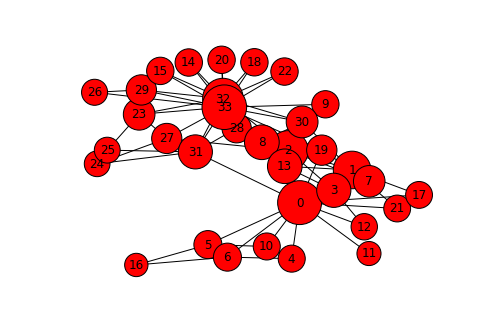

In [66]:
# 画网络图，节点的尺寸对应katz中心性大小
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=katz_keys,node_size=[x*6000 for x in katz_values])

###  2.6 连通度中心性(communicability centrality)

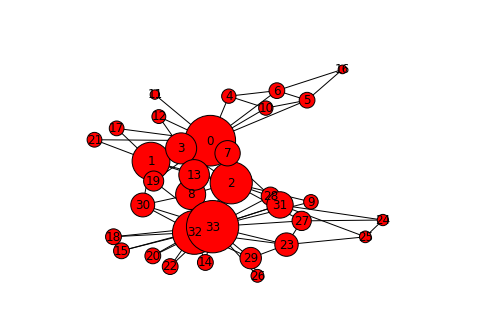

In [67]:
# 获取节点的连通度中心性
communicability_G=nx.communicability_centrality(G)
#取出键值
communicability_values=communicability_G.values()
#取键形成新的列表
communicability_keys=communicability_G.keys()
# 画网络图，节点的尺寸对应连通度中心性大小
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=communicability_keys,node_size=[x*20 for x in communicability_values])

###  2.7 load_centrality

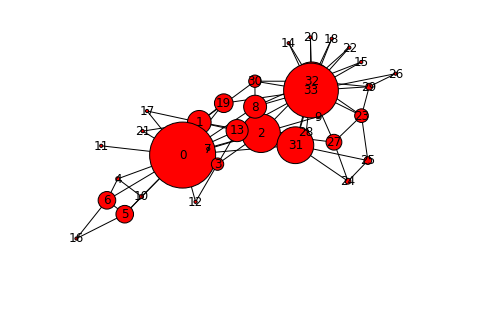

In [68]:
load_centrality_G=nx.load_centrality(G)

#取出键值
load_centrality_values=load_centrality_G.values()
#取键形成新的列表
load_centrality_keys=load_centrality_G.keys()

pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=load_centrality_keys,node_size=[x*10000+10 for x in load_centrality_values])

###  2.8 边介数中心性（edge_betweenness_centrality）

In [69]:
# 获取边的介数中心性
edge_betweenness=nx.edge_betweenness_centrality(G)
print edge_betweenness

{(u'1', u'17'): 0.018699601052542224, (u'9', u'33'): 0.029615482556659026, (u'5', u'10'): 0.0047534165181224, (u'0', u'19'): 0.04593696064284299, (u'33', u'18'): 0.03473955238661121, (u'0', u'7'): 0.0228206434088787, (u'2', u'7'): 0.02521432815550462, (u'27', u'23'): 0.01053673994850465, (u'8', u'33'): 0.04043657867187279, (u'23', u'29'): 0.00665478312537136, (u'0', u'13'): 0.042371898254251195, (u'28', u'33'): 0.024564977506153975, (u'14', u'32'): 0.02408397702515349, (u'8', u'30'): 0.00980392156862745, (u'15', u'33'): 0.03473955238661121, (u'26', u'33'): 0.05429080723198369, (u'13', u'33'): 0.06782389723566193, (u'25', u'23'): 0.019776193305605056, (u'0', u'5'): 0.07813428401663694, (u'2', u'9'): 0.030803836686189627, (u'25', u'31'): 0.042057833234303836, (u'3', u'2'): 0.022430184194890075, (u'29', u'32'): 0.023328523328523317, (u'3', u'12'): 0.012299465240641709, (u'24', u'27'): 0.018657159833630418, (u'0', u'11'): 0.058823529411764705, (u'1', u'19'): 0.014633732280791106, (u'32', u

In [70]:
#取出键值
edge_betweenness_values=edge_betweenness.values()
print edge_betweenness_values

[0.018699601052542224, 0.029615482556659026, 0.0047534165181224, 0.04593696064284299, 0.03473955238661121, 0.0228206434088787, 0.02521432815550462, 0.01053673994850465, 0.04043657867187279, 0.00665478312537136, 0.042371898254251195, 0.024564977506153975, 0.02408397702515349, 0.00980392156862745, 0.03473955238661121, 0.05429080723198369, 0.06782389723566193, 0.019776193305605056, 0.07813428401663694, 0.030803836686189627, 0.042057833234303836, 0.022430184194890075, 0.023328523328523317, 0.012299465240641709, 0.018657159833630418, 0.058823529411764705, 0.014633732280791106, 0.02408397702515349, 0.02681436210847975, 0.059382338794103484, 0.0029708853238265, 0.02525252525252525, 0.03266983561101207, 0.0304416716181422, 0.04119203236850298, 0.024083977025153483, 0.0777876807288572, 0.034739552386611215, 0.04012392835922248, 0.008225108225108224, 0.01240556828792123, 0.007630931160342924, 0.04652406417112299, 0.04010695187165775, 0.02323232323232323, 0.02049910873440285, 0.04012392835922247,

In [71]:
#取键形成新的列表
edge_betweenness_keys=edge_betweenness.keys()
print edge_betweenness_keys

[(u'1', u'17'), (u'9', u'33'), (u'5', u'10'), (u'0', u'19'), (u'33', u'18'), (u'0', u'7'), (u'2', u'7'), (u'27', u'23'), (u'8', u'33'), (u'23', u'29'), (u'0', u'13'), (u'28', u'33'), (u'14', u'32'), (u'8', u'30'), (u'15', u'33'), (u'26', u'33'), (u'13', u'33'), (u'25', u'23'), (u'0', u'5'), (u'2', u'9'), (u'25', u'31'), (u'3', u'2'), (u'29', u'32'), (u'3', u'12'), (u'24', u'27'), (u'0', u'11'), (u'1', u'19'), (u'32', u'18'), (u'30', u'33'), (u'19', u'33'), (u'4', u'10'), (u'1', u'0'), (u'23', u'33'), (u'8', u'32'), (u'27', u'2'), (u'22', u'32'), (u'0', u'2'), (u'20', u'33'), (u'21', u'0'), (u'32', u'33'), (u'1', u'13'), (u'2', u'13'), (u'0', u'12'), (u'24', u'31'), (u'1', u'2'), (u'0', u'3'), (u'0', u'17'), (u'21', u'1'), (u'1', u'7'), (u'3', u'13'), (u'32', u'30'), (u'0', u'4'), (u'24', u'25'), (u'1', u'30'), (u'3', u'7'), (u'31', u'33'), (u'0', u'31'), (u'4', u'6'), (u'0', u'10'), (u'5', u'16'), (u'2', u'32'), (u'0', u'8'), (u'29', u'33'), (u'28', u'31'), (u'20', u'32'), (u'6', u'16'

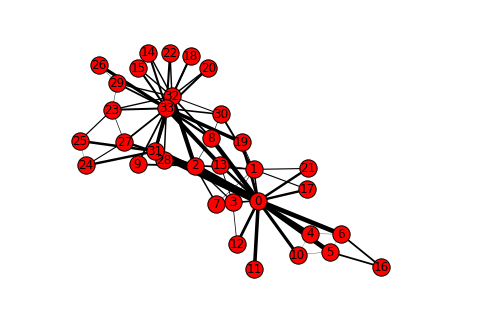

In [72]:
# 画网络图，连边的粗细对应介数中心性大小
pos=nx.spring_layout(G)
#nx.draw(G,pos,with_labels=True,nodelist=load_centrality_keys,node_size=[x*10000+10 for x in load_centrality_values])
nx.draw(G,pos,with_labels=True,edgelist=edge_betweenness_keys,width=[x*60 for x in edge_betweenness_values])

### 2.9 PageRank中心性（PageRank）

PageRank基于网络节点的入度连接计算网络中节点的中心性排序，最初用来对万维网中页面的搜索相关性进行排序。

In [73]:
# 连边对数据可以直接读取来生成网络
G = nx.read_edgelist("karate.txt") 

In [74]:
# 获取节点的PageRank值，其中alpha参数为pagerank的阻尼参数，默认为0.85
PageRank_G=nx.pagerank(G, alpha=0.9)
print PageRank_G

{u'24': 0.02045532726885293, u'25': 0.02041070287756967, u'26': 0.014276670024478017, u'27': 0.02557998502294416, u'20': 0.013916466828162463, u'21': 0.01395744128254017, u'22': 0.013916466828162463, u'23': 0.03165330491466868, u'28': 0.019381731951150435, u'29': 0.026038055492344045, u'1': 0.05434031558257919, u'0': 0.09923208031303203, u'3': 0.03661246056285369, u'2': 0.05919704684187155, u'5': 0.028358863602879276, u'4': 0.02129205163493875, u'7': 0.024777139411941044, u'6': 0.028358863602879276, u'9': 0.01374609528355658, u'8': 0.030411546757834786, u'11': 0.00852322024354681, u'10': 0.02129205163493875, u'13': 0.03025430900999545, u'12': 0.01401516915803374, u'15': 0.013916466828162463, u'14': 0.013916466828162463, u'17': 0.01395744128254017, u'16': 0.015703158296594022, u'19': 0.019434610880594574, u'32': 0.07330616298815511, u'31': 0.03757266533528672, u'30': 0.024824588072166538, u'33': 0.1034546065284215, u'18': 0.013916466828162461}


In [75]:
#取出键值
PageRank_values=PageRank_G.values()
print PageRank_values

[0.02045532726885293, 0.02041070287756967, 0.014276670024478017, 0.02557998502294416, 0.013916466828162463, 0.01395744128254017, 0.013916466828162463, 0.03165330491466868, 0.019381731951150435, 0.026038055492344045, 0.05434031558257919, 0.09923208031303203, 0.03661246056285369, 0.05919704684187155, 0.028358863602879276, 0.02129205163493875, 0.024777139411941044, 0.028358863602879276, 0.01374609528355658, 0.030411546757834786, 0.00852322024354681, 0.02129205163493875, 0.03025430900999545, 0.01401516915803374, 0.013916466828162463, 0.013916466828162463, 0.01395744128254017, 0.015703158296594022, 0.019434610880594574, 0.07330616298815511, 0.03757266533528672, 0.024824588072166538, 0.1034546065284215, 0.013916466828162461]


In [76]:
#取键形成新的列表
PageRank_keys=PageRank_G.keys()
print PageRank_keys

[u'24', u'25', u'26', u'27', u'20', u'21', u'22', u'23', u'28', u'29', u'1', u'0', u'3', u'2', u'5', u'4', u'7', u'6', u'9', u'8', u'11', u'10', u'13', u'12', u'15', u'14', u'17', u'16', u'19', u'32', u'31', u'30', u'33', u'18']


## 作业1：根据节点pagerank的大小进行可视化